In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    #print('Angle Rates\n', angle_rates)
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
    #Distribute the domain of each between 0 to 2*pi
    angle_rads = angle_rads*2*np.pi/position
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return pos_encoding

In [3]:
tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
print(pos_encoding.shape)
#print(pos_encoding)


(1, 16, 16)


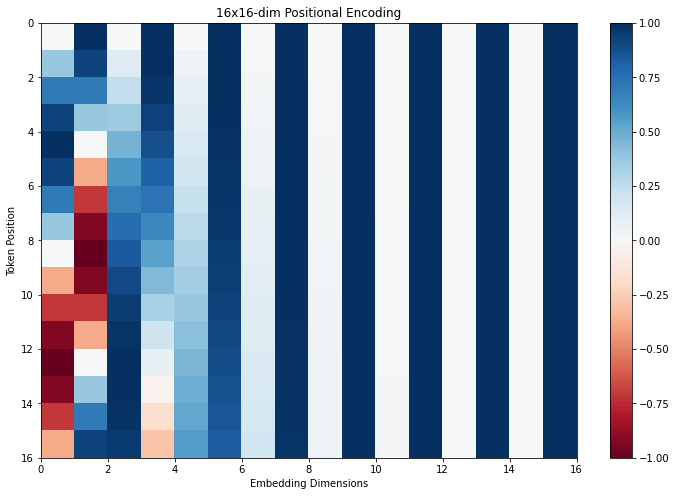

In [4]:
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.title('16x16-dim Positional Encoding')
plt.savefig('original.png')
plt.show()

In [5]:
#Check if matrix is square then check if orthogonal. A matrix is orthogonal if the columns are orthonormal, A.T dot A = I
def isOrthogonal(matrix):
    r = len(matrix[0])
    c = len(matrix[1])
    if r != c:
        print('Matrix is not square.')
    else:
        dot_prod = np.dot(matrix.T,matrix)
        #print(dot_prod)
        for i in range(r):
            for j in range(c):
                if i == j and dot_prod[i][j] != 1:
                    return False
                elif i != j and dot_prod[i][j] != 0:
                    return False                
        return True

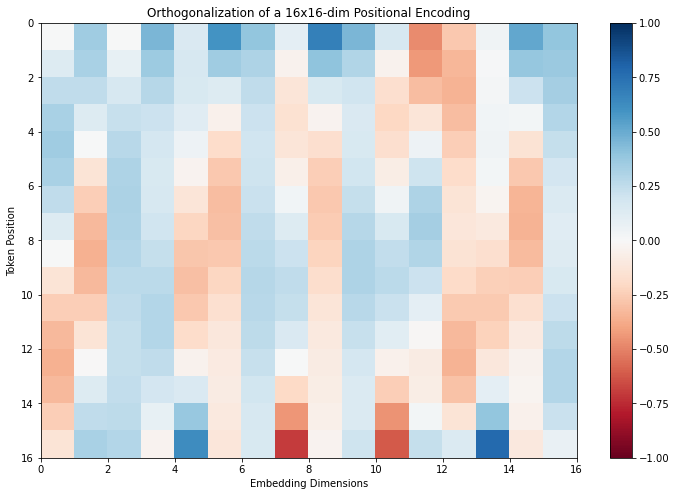

In [6]:
def gram_schmidt(B):
    """Orthogonalize B using Gram-Schmidth method"""
    A = np.zeros((len(B[0]), len(B[1])))
    for j in range(len(B[0])):
        # To orthogonalize the vector in column j with respect to the previous vectors,
        # subtract from it its projection onto
        # each of the previous vectors.
        A[:, j] = B[:, j]
        for k in range(j-1):
            A[:, j] = A[:, j] - np.matmul(A[:,k].T, A[:,j]) * A[:,k]
        # Normalize the vector
        A[:,j] = A[:,j] / np.sqrt(np.matmul(A[:, j].T, A[:, j]))
    return A

# Check if the set of vectors is orthogonal, 
# If not, use gram_schmidt function to make if orthogonal

if isOrthogonal(pos_encoding[0]) == False:
    orthogonal_pos_raw = np.copy(pos_encoding[0])
    orthogonal_pos = gram_schmidt(orthogonal_pos_raw)
    #print("Orthonormalized Vectors\n", orthogonal_pos)
    plt.figure(figsize=(12,8))
    plt.pcolormesh(orthogonal_pos, cmap='RdBu', vmin=-1., vmax=1.)
    plt.xlabel('Embedding Dimensions')
    plt.xlim((0, dimensions))
    plt.ylim((tokens,0))
    plt.ylabel('Token Position')
    plt.colorbar()
    plt.title('Orthogonalization of a 16x16-dim Positional Encoding')
    plt.savefig('orthonormal.png')
    plt.show()